In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the datasets
input_df = pd.read_csv("input.csv")
people_df = pd.read_csv("updated_people.csv")



# Preview the datasets
print(input_df.head())
print(people_df.head())


            Food_items  Breakfast  Lunch  Dinner  VegNovVeg  Calories  Fats  \
0           aloo Tikki          0      1       1          0        22   0.2   
1                Kadhi          1      0       0          0       160  15.0   
2              Bananas          1      0       0          0        89   0.3   
3  Bread made in wheat          0      1       1          0       250   1.5   
4        Mango Chutney          1      0       0          0       349   0.4   

   Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  \
0       2.4  0.91     23.0      14      224.0            4.1    2.0         0   
1       2.0  0.55     12.0       7      485.0            8.5    6.7         0   
2       1.1  0.26      5.0       1      358.0           23.0    2.6         0   
3      10.0  2.76     20.0     439      165.0           49.0    4.1         0   
4      14.0  6.80    190.0     298       77.0           77.0   13.0         0   

   Sugars  
0     1.3  
1     0.7  
2 

In [3]:
# Handling missing values in a simplified way

# Fill missing numerical values with the mean of each column
people_df.fillna(people_df.mean(numeric_only=True), inplace=True)

# Fill missing categorical values (like 'diet_type' or 'sex') with the mode of the column
people_df.fillna(people_df.mode().iloc[0], inplace=True)

# Check again for missing values after filling
print("\nMissing values after handling:\n", people_df.isnull().sum())



Missing values after handling:
 age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0
weight                       0
diet_type                    0
gym                          0
calories_req                 0
daily_calorie_requirement    0
dtype: int64


In [4]:
# Data Exploratory Functions

# Show the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(people_df.head())

# Check basic information about the dataset (columns, data types, and missing values)
print("\nDataset Info:")
print(people_df.info())

# Summary statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(people_df.describe())

# Summary statistics of categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(people_df.describe(include=['object']))

# Check for missing values in each column
print("\nMissing Values in Dataset:")
print(people_df.isnull().sum())

# Get the unique values and counts of categorical columns (e.g., 'diet_type')
print("\nUnique Values in 'diet_type' Column:")
print(people_df['diet_type'].value_counts())



First 5 Rows of the Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  weight       diet_type  gym  calories_req  \
0   0     1       1      68  Non-Vegetarian    1          1360   
1   0     2       1      64      Vegetarian    0          1200   
2   0     2       1      73      Vegetarian    0          1480   
3   0     2       1      81  Non-Vegetarian    1          2160   
4   0     2       1      72      Vegetarian    1          1580   

   daily_calorie_requirement  
0                       2200  
1                       2

In [5]:
# Encode the 'diet_type' column as numerical values (Vegetarian = 1, Non-Vegetarian = 0)
label_encoder = LabelEncoder()
people_df['diet_type_encoded'] = label_encoder.fit_transform(people_df['diet_type'])

# Select relevant features and target for modeling
features = people_df[['age', 'sex', 'weight', 'gym', 'calories_req', 'daily_calorie_requirement']]
target = people_df['diet_type_encoded']

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)


In [8]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 1 19]
 [ 6 35]]

Classification Report:
                 precision    recall  f1-score   support

Non-Vegetarian       0.14      0.05      0.07        20
    Vegetarian       0.65      0.85      0.74        41

      accuracy                           0.59        61
     macro avg       0.40      0.45      0.41        61
  weighted avg       0.48      0.59      0.52        61



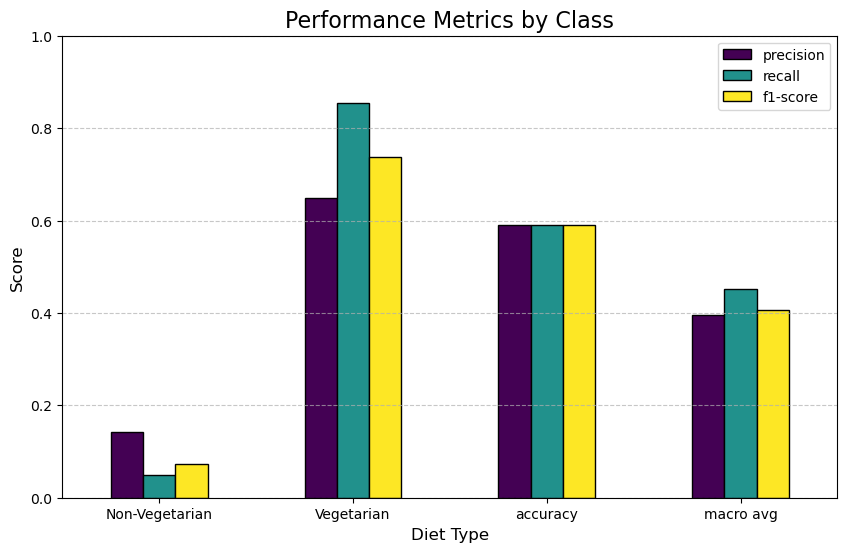

In [9]:
# Extract metrics from the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Filter only relevant metrics: Precision, Recall, F1-score
metrics_df = metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1]  # Exclude 'accuracy' row

# Plot the metrics as a grouped bar plot
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Performance Metrics by Class', fontsize=16)
plt.xlabel('Diet Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)  # Keep x-tick labels horizontal
plt.ylim(0, 1)  # Metrics range between 0 and 1
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
def recommend_exact_food_plan(total_calories):
    """
    Recommends food items for Breakfast, Lunch, and Dinner such that the total calories
    match the given input calories exactly.
    """
    # Define calorie split ratios for the meals
    breakfast_target = int(0.2 * total_calories)
    lunch_target = int(0.45 * total_calories)
    dinner_target = int(0.35 * total_calories)

    # Helper function to select food items for a specific meal type
    def get_meal_plan(meal_type, calorie_limit):
        selected_items = []
        current_calories = 0

        # Filter food items that match the meal type
        meal_items = input_df[input_df[meal_type] == 1].sort_values('Calories')

        # Greedily select items until we reach or get close to the calorie limit
        for _, item in meal_items.iterrows():
            if current_calories + item['Calories'] <= calorie_limit:
                selected_items.append(item)
                current_calories += item['Calories']

        return pd.DataFrame(selected_items), current_calories

    # Get food recommendations for each meal
    breakfast_plan, breakfast_calories = get_meal_plan('Breakfast', breakfast_target)
    lunch_plan, lunch_calories = get_meal_plan('Lunch', lunch_target)
    dinner_plan, dinner_calories = get_meal_plan('Dinner', dinner_target)

    # Calculate the total calories from all meals
    total_meal_calories = breakfast_calories + lunch_calories + dinner_calories

    # Print the recommendations and total calories for each meal
    print(f"--- Breakfast (Target: {breakfast_target} calories) ---")
    print(breakfast_plan[['Food_items', 'Calories']])
    print(f"Total Breakfast Calories: {breakfast_calories}\n")

    print(f"--- Lunch (Target: {lunch_target} calories) ---")
    print(lunch_plan[['Food_items', 'Calories']])
    print(f"Total Lunch Calories: {lunch_calories}\n")

    print(f"--- Dinner (Target: {dinner_target} calories) ---")
    print(dinner_plan[['Food_items', 'Calories']])
    print(f"Total Dinner Calories: {dinner_calories}\n")

    # Check if the total matches the input calorie requirement
    print(f"--- Total Calories for the Day: {total_meal_calories} ---")
    if total_meal_calories == total_calories:
        print("The total calories match the input requirement exactly!")
    else:
        print(f"Warning: Total calories ({total_meal_calories}) do not match the input exactly.")

# Example Usage: Recommend a food plan for someone needing 2000 calories
recommend_exact_food_plan(2000)

--- Breakfast (Target: 400 calories) ---
      Food_items  Calories
54     Laal Chai         1
62          Chai         1
9         Coffee         2
38        Tomato        16
46     Mushrooms        22
64  Strawberries        32
53    Cornflakes        40
51  Orange juice        45
63        Apples        52
18         Pears        57
39          Dahi        60
Total Breakfast Calories: 328

--- Lunch (Target: 900 calories) ---
         Food_items  Calories
38           Tomato        16
21          Sitafal        18
46        Mushrooms        22
0        aloo Tikki        22
5             Baati        25
59            Beans        31
7       Cauliflower        32
15     Paneer Tikka        40
39             Dahi        60
17           Maggie        71
52       Sweet Dahi        73
48  Sweet Potatoes         76
19      Aloo Matar         81
49      Masala Aloo        87
56    Butter Paneer        95
10             Corn        97
Total Lunch Calories: 846

--- Dinner (Target: 700 calori